In [203]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../../')


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())

'2019-04-18 10:48:30.408670'

In [204]:
ca_stations = pd.read_excel('canadian_stations.xlsx')

# Missing stations in the data

In [205]:
WSC_FLOWS = pd.read_pickle('../../Loadings Canada 2/data/WSC_FLOWS')

In [206]:
missing_stations = set(ca_stations['station'].values) - set(WSC_FLOWS.columns)
missing_stations

{'02GG010', '02GG011', '02GH005', 14827}

In [207]:
WSC_STATIONS = pd.read_pickle('../../Loadings Canada 2/data/WSC_STATIONS')

In [208]:
WSC_STATIONS[WSC_STATIONS.STATION_NUMBER.isin(missing_stations)]

,STATION_NUMBER,STATION_NAME,PROV_TERR_STATE_LOC,REGIONAL_OFFICE_ID,HYD_STATUS,SED_STATUS,LATITUDE,LONGITUDE,DRAINAGE_AREA_GROSS,DRAINAGE_AREA_EFFECT,RHBN,REAL_TIME,CONTRIBUTOR_ID,OPERATOR_ID,DATUM_ID,Level,Flow
859,02GG010,ST. CLAIR RIVER AT POINT EDWARD,ON,5,A,NaN,42.991280,-82.421501,NaN,NaN,0,0,647.0,218.0,46.0,True,
860,02GG011,ST. CLAIR RIVER AT PORT LAMBTON,ON,5,A,NaN,42.657280,-82.507080,NaN,NaN,0,0,647.0,218.0,46.0,True,
867,02GH005,LAKE ST. CLAIR AT BELLE RIVER,ON,5,A,NaN,42.296169,-82.710861,NaN,NaN,0,0,647.0,218.0,46.0,True,


# Flows for present rivers

In [209]:
WSC_FLOWS[WSC_FLOWS.columns.intersection(ca_stations['station'].values)].head()

,02GA003,02GB001,02GB010,02GC002,02GC007,02GC008,02GC010,02GC014,02GC018,02GC021,02GC022,02GC026,02GC029,02GC030,02GC031,02GC036,02GE002,02GE003,02GE006,02GE007,02GG002,02GG003,02GG005,02GG006,02GG009,02GG013,02GH002,02GH003,02GH004,02GH011,02GH016,02HA003,02HA007,02HA013,02HA019,02HA024
1996-01-01,15.8,24.500000,0.395,0.42,4.40,2.12,1.70,NaN,0.490,NaN,1.76,3.10,0.170,0.250,0.078,NaN,17.299999,21.0,30.200001,0.175,3.18,4.65,NaN,0.302,1.75,NaN,0.185,0.055,0.070,0.013,NaN,5270.0,0.180,NaN,140.0,NaN
1996-01-02,15.6,24.200001,0.380,0.39,4.20,2.11,1.63,NaN,0.440,NaN,1.76,3.00,0.160,0.230,0.070,NaN,16.600000,20.0,29.500000,0.184,3.15,4.66,NaN,0.265,1.45,NaN,0.190,0.059,0.051,0.009,NaN,4590.0,0.170,NaN,139.0,NaN
1996-01-03,15.4,24.000000,0.350,0.38,3.75,1.88,1.50,NaN,0.421,NaN,1.72,2.75,0.145,0.222,0.066,NaN,14.400000,19.0,19.900000,0.170,2.85,4.35,NaN,0.240,1.10,NaN,0.180,0.056,0.049,0.007,NaN,4260.0,0.155,NaN,137.0,NaN
1996-01-04,15.2,23.799999,0.320,0.37,3.50,2.00,1.37,NaN,0.405,NaN,1.68,2.55,0.130,0.215,0.062,NaN,14.400000,23.1,17.299999,0.165,2.65,4.05,NaN,0.220,0.90,NaN,0.170,0.053,0.048,0.006,NaN,5390.0,0.140,NaN,139.0,NaN
1996-01-05,15.0,23.600000,0.310,0.36,3.30,1.95,1.29,NaN,0.397,NaN,1.65,2.40,0.115,0.210,0.060,NaN,15.600000,20.0,17.299999,0.155,2.45,3.80,NaN,0.200,0.70,NaN,0.165,0.045,0.047,0.005,NaN,5700.0,0.130,NaN,139.0,NaN


In [210]:
df = WSC_STATIONS[(WSC_STATIONS.STATION_NUMBER == '02GG014') | (
    WSC_STATIONS.STATION_NUMBER.isin(WSC_FLOWS.columns.intersection(ca_stations['station'].values)))][[
    'STATION_NAME',
    'STATION_NUMBER',
    'LATITUDE',
    'LONGITUDE',
    'DRAINAGE_AREA_GROSS'
]]
df['STATION_NAME'] = df['STATION_NAME'].apply(lambda x: x.title())
df['STATION_NAME'] = df['STATION_NAME'].apply(lambda x: x+' ON')
df['country'] = 'CA'
df = df.sort_values('DRAINAGE_AREA_GROSS', ascending=False)
df[['country', 'STATION_NAME', 'STATION_NUMBER', 'LATITUDE', 'LONGITUDE', 'DRAINAGE_AREA_GROSS']]

,country,STATION_NAME,STATION_NUMBER,LATITUDE,LONGITUDE,DRAINAGE_AREA_GROSS
878,CA,Niagara River At Queenston ON,02HA003,43.156941,-79.047218,686000.000000
882,CA,Niagara River At Fort Erie ON,02HA013,42.930279,-78.914169,683000.000000
862,CA,St. Clair River At Port Huron ON,02GG014,42.986939,-82.424721,576013.000000
768,CA,Grand River At Brantford ON,02GB001,43.132721,-80.267311,5200.000000
842,CA,Thames River At Thamesville ON,02GE003,42.544861,-81.967270,4370.000000
845,CA,Thames River Near Dutton ON,02GE006,42.730690,-81.577469,3820.000000
725,CA,Grand River At Galt ON,02GA003,43.353111,-80.315750,3520.000000
841,CA,Thames River At Byron ON,02GE002,42.962502,-81.331780,3080.000000
852,CA,Sydenham River At Florence ON,02GG003,42.650612,-82.008392,1150.000000
851,CA,Sydenham River Near Alvinston ON,02GG002,42.830810,-81.851723,701.000000


In [211]:
df[df.STATION_NUMBER.isin(['02GB001', '02GE006', '02GG005', '02GH004', '02GH016'])]

,STATION_NAME,STATION_NUMBER,LATITUDE,LONGITUDE,DRAINAGE_AREA_GROSS,country
768,Grand River At Brantford ON,02GB001,43.132721,-80.267311,5200.0,CA
845,Thames River Near Dutton ON,02GE006,42.730690,-81.577469,3820.0,CA
854,Sydenham River At Strathroy ON,02GG005,42.958859,-81.627136,171.0,CA
866,Turkey Creek At Windsor ON,02GH004,42.260502,-83.039833,29.6,CA
877,Turkey Creek At South Windsor ON,02GH016,42.264080,-83.032417,14.6,CA


In [225]:
dictionary_of_ca_basins = {
    'SCR': ['St. Clair River At Port Huron ON'],
    'SCL': ['Mcgregor Creek Near Chatham ON', 'Ruscom River Near Ruscom Station ON',
           'Sydenham River At Florence ON', 'Sydenham River Near Alvinston ON',
            'Thames River Near Dutton ON', 'Sydenham River At Strathroy ON',
           'Thames River At Byron ON', 'Thames River At Thamesville ON',
            'Bear Creek Below Brigden ON', 
            'Bear Creek Near Petrolia ON', 'Black Creek Near Bradshaw ON',
           ],
    'DR': ['Canard River Near Lukerville ON', 'Little River At Windsor ON',
          'Turkey Creek At Windsor ON', 'Turkey Creek At South Windsor ON',
          ],
    'WB': [],
    'CB': ['Catfish Creek At Aylmer ON', 'Catfish Creek Near Sparta ON', 
           'Dodd Creek Below Paynes Mills ON', 'Kettle Creek Above St. Thomas ON',
          'Kettle Creek At St. Thomas ON', 'Silver Creek Near Grovesend ON',
           'Big Otter Creek Near Calton ON', 'Big Otter Creek At Tillsonburg ON', 
          ],
    'EB': ['Big Creek Near Walsingham ON', 'Grand River At Galt ON',
          'Lynn River At Simcoe ON','Mckenzie Creek Near Caledonia ON',
          'Nanticoke Creek At Nanticoke ON', 'Venison Creek Near Walsingham ON',
          'Young Creek Near Vittoria ON', 'Grand River At Brantford ON',
          ],
    'NR': ['Niagara River At Fort Erie ON', 'Niagara River At Queenston ON',
          'Oswego Creek At Canborough ON', 'Welland Canal Diversion From Lake Erie ON',
          'Welland River Below Caistor Corners ON', ],
}

In [226]:
ca_river_sorted = dictionary_of_ca_basins['SCR'] + \
dictionary_of_ca_basins['SCL'] + \
dictionary_of_ca_basins['DR'] + \
dictionary_of_ca_basins['WB'] + \
dictionary_of_ca_basins['CB'] + \
dictionary_of_ca_basins['EB'] + \
dictionary_of_ca_basins['NR']

ca_river_sorted

['St. Clair River At Port Huron ON',
 'Mcgregor Creek Near Chatham ON',
 'Ruscom River Near Ruscom Station ON',
 'Sydenham River At Florence ON',
 'Sydenham River Near Alvinston ON',
 'Thames River Near Dutton ON',
 'Sydenham River At Strathroy ON',
 'Thames River At Byron ON',
 'Thames River At Thamesville ON',
 'Bear Creek Below Brigden ON',
 'Bear Creek Near Petrolia ON',
 'Black Creek Near Bradshaw ON',
 'Canard River Near Lukerville ON',
 'Little River At Windsor ON',
 'Turkey Creek At Windsor ON',
 'Turkey Creek At South Windsor ON',
 'Catfish Creek At Aylmer ON',
 'Catfish Creek Near Sparta ON',
 'Dodd Creek Below Paynes Mills ON',
 'Kettle Creek Above St. Thomas ON',
 'Kettle Creek At St. Thomas ON',
 'Silver Creek Near Grovesend ON',
 'Big Otter Creek Near Calton ON',
 'Big Otter Creek At Tillsonburg ON',
 'Big Creek Near Walsingham ON',
 'Grand River At Galt ON',
 'Lynn River At Simcoe ON',
 'Mckenzie Creek Near Caledonia ON',
 'Nanticoke Creek At Nanticoke ON',
 'Venison Cre

# US Rivers

In [227]:
us_stations = pd.read_excel('us_stations.xlsx')

In [228]:
us_stations.station.values

array([4159130, 4159492, 4159900, 4160600, 4165500, 4165710, 4166500,
       4167000, 4168400, 4168580, 4174500, 4174518, 4176500, 4177000,
       4193500, 4193999, 4195820, 4198000, 4199000, 4199155, 4199500,
       4200500, 4201500, 4201526, 4208504, 4208700, 4209000, 4212100,
       4213000, 4213075, 4213152, 4213500, 4214500, 4215000, 4215500,
       4216000, 4216220, 4218000, 4218518, 4159500, 4164500, 4168000,
       4176605, 4212500])

In [229]:
from zipfile import ZipFile

import pandas as pd
import pyperclip

stations = pd.read_csv('../../../measurements/USGS stream data/OHIO station info.csv')
stations_1 = pd.read_csv(ZipFile('../../../measurements/USGS stream data/MICHIGAN stations.zip').open(name='station.csv'))
stations_2 = pd.read_csv(ZipFile('../../../measurements/USGS stream data/NEW YORK stations.zip').open(name='station.csv'))
stations = stations.append(stations_1.append(stations_2))


In [230]:
def append_name(x):
    return 'USGS-0' + str(x)

station_names = list(map(append_name, us_stations.station.values))

In [231]:
res = stations[stations.MonitoringLocationIdentifier.isin(station_names)][
    ['MonitoringLocationIdentifier',
        'MonitoringLocationName',
     'LatitudeMeasure',
     'LongitudeMeasure',
     'DrainageAreaMeasure/MeasureValue',
    ]
]
res['MonitoringLocationName'] = res['MonitoringLocationName'].apply(lambda x: x.title())


res['DrainageAreaMeasure/MeasureValue'] = res['DrainageAreaMeasure/MeasureValue']/0.386102

res = res.rename(columns={'MonitoringLocationIdentifier': 'STATION_NUMBER', 
'MonitoringLocationName': 'STATION_NAME',
'LatitudeMeasure': 'LATITUDE',
'LongitudeMeasure': 'LONGITUDE',
'DrainageAreaMeasure/MeasureValue': 'DRAINAGE_AREA_GROSS'})

res['STATION_NUMBER'] = res['STATION_NUMBER'].apply(lambda x: x[5:])

res['country'] = 'US'
res = res.sort_values('DRAINAGE_AREA_GROSS', ascending=False)
res[['country', 'STATION_NAME', 'STATION_NUMBER', 'LATITUDE', 'LONGITUDE', 'DRAINAGE_AREA_GROSS']]

,country,STATION_NAME,STATION_NUMBER,LATITUDE,LONGITUDE,DRAINAGE_AREA_GROSS
6402,US,Niagara River At Black Rock Lock At Buffalo Ny,04216220,42.933946,-78.904481,682980.145143
6389,US,Niagara River At Buffalo Ny,04216000,42.877778,-78.916389,682980.145143
4333,US,"Detroit River At Fort Wayne At Detroit, Mi",04165710,42.298094,-83.092700,592589.522976
3964,US,"St. Clair River At Port Huron, Mi",04159130,42.986974,-82.424637,576013.592263
1161,US,Maumee River At Waterville Oh,04193500,41.500053,-83.712715,16394.631470
27675,US,Maumee River At Waterville Oh,04193500,41.500053,-83.712715,16394.631470
1232,US,Sandusky River Near Fremont Oh,04198000,41.307831,-83.158809,3240.076456
4841,US,"River Raisin Near Monroe, Mi",04176500,41.960601,-83.531046,2698.768719
27677,US,Cuyahoga River Near Newburgh Heights Oh,04208504,41.462552,-81.680963,2040.911469
1358,US,Cuyahoga River Near Newburgh Heights Oh,04208504,41.462552,-81.680963,2040.911469


In [232]:
dictionary_of_us_basins = {
    'SCR': ['Belle River At Memphis, Mi', 'Black River Near Jeddo, Mi',
           'Mill Creek Near Avoca, Mi', 'St. Clair River At Port Huron, Mi',
           'Black River Near Fargo, Mi', ],
    'SCL': ['Clinton River At Moravian Drive At Mt. Clemens, Mi', 'North Branch Clinton River Near Mt. Clemens, Mi'],
    'DR': ['Detroit River At Fort Wayne At Detroit, Mi', 'Ecorse River At Dearborn Heights, Mi',
           'Lower River Rouge At Dearborn, Mi', 'Middle River Rouge Near Garden City, Mi',
          'River Rouge At Detroit, Mi', ],
    'WB': ['Huron River At Ann Arbor, Mi', 'Malletts Creek At Ann Arbor, Mi',
          'Maumee River At Waterville Oh', 'Maumee River At Waterville Oh', 
           'Ottawa River At University Of Toledo, Toledo Oh', 'Portage River Near Elmore Oh',
           'River Raisin Near Monroe, Mi', 'Wolf Creek At Holland Oh', 'Lower River Rouge At Inkster, Mi',
           'Otter Creek At La Salle, Mi'
          ],
    'CB': ['Abram Creek At Kolthoff Drive At Brook Park Oh', 'Black River At Elyria Oh',
          'Chagrin River At Willoughby Oh', 'Conneaut Creek At Conneaut Oh',
           'Cuyahoga River Near Newburgh Heights Oh', 'Euclid Creek At Cleveland Oh',
           'Grand River Near Painesville Oh', 'Huron River At Milan Oh',
           'Old Woman Creek At Berlin Rd Near Huron Oh', 'Rocky River Near Berea Oh',
           'Sandusky River Near Fremont Oh', 'Vermilion River Near Vermilion Oh',
           'Ashtabula River Near Ashtabula Oh',
          ],
    'EB': ['Buffalo Creek At Gardenville Ny', 'Cattaraugus Creek At Gowanda Ny',
          'Cayuga Creek Near Lancaster Ny', 'Cazenovia Creek At Ebenezer Ny'],
    'NR': ['Ellicott Creek Below Williamsville Ny', 'Niagara River At Black Rock Lock At Buffalo Ny',
           'Niagara River At Buffalo Ny', 'Tonawanda Creek At Rapids Ny'],
}

In [233]:
us_river_sorted = dictionary_of_us_basins['SCR'] + \
dictionary_of_us_basins['SCL'] + \
dictionary_of_us_basins['DR'] + \
dictionary_of_us_basins['WB'] + \
dictionary_of_us_basins['CB'] + \
dictionary_of_us_basins['EB'] + \
dictionary_of_us_basins['NR']

len(us_river_sorted)

43

# Final Table


In [234]:
master_df = res[res.STATION_NAME.isin(dictionary_of_us_basins['SCR'])].append( 
    df[df.STATION_NAME.isin(dictionary_of_ca_basins['SCR'])], ignore_index=True)
master_df['basin'] = 'SCR'

new_df = res[res.STATION_NAME.isin(dictionary_of_us_basins['SCL'])].append( 
    df[df.STATION_NAME.isin(dictionary_of_ca_basins['SCL'])], ignore_index=True)
new_df['basin'] = 'SCL'


master_df = master_df.append(new_df, ignore_index=1)

new_df = res[res.STATION_NAME.isin(dictionary_of_us_basins['DR'])].append( 
    df[df.STATION_NAME.isin(dictionary_of_ca_basins['DR'])], ignore_index=True)
new_df['basin'] = 'DR'

master_df = master_df.append(new_df, ignore_index=1)


new_df = res[res.STATION_NAME.isin(dictionary_of_us_basins['WB'])].append( 
    df[df.STATION_NAME.isin(dictionary_of_ca_basins['WB'])], ignore_index=True)
new_df['basin'] = 'WB'

master_df = master_df.append(new_df, ignore_index=1)

new_df = res[res.STATION_NAME.isin(dictionary_of_us_basins['CB'])].append( 
    df[df.STATION_NAME.isin(dictionary_of_ca_basins['CB'])], ignore_index=True)
new_df['basin'] = 'CB'

master_df = master_df.append(new_df, ignore_index=1)

new_df = res[res.STATION_NAME.isin(dictionary_of_us_basins['EB'])].append( 
    df[df.STATION_NAME.isin(dictionary_of_ca_basins['EB'])], ignore_index=True)
new_df['basin'] = 'EB'

master_df = master_df.append(new_df, ignore_index=1)

new_df = res[res.STATION_NAME.isin(dictionary_of_us_basins['NR'])].append( 
    df[df.STATION_NAME.isin(dictionary_of_ca_basins['NR'])], ignore_index=True)
new_df['basin'] = 'NR'

master_df = master_df.append(new_df, ignore_index=1)

master_df['STATION_NAME'] = master_df['STATION_NAME'].apply(lambda x: (x[:-3] + ', ' + x[-2:].upper()).replace(',,',',') )

    
master_df['DRAINAGE_AREA_GROSS'] = master_df['DRAINAGE_AREA_GROSS'].apply(lambda x: round(x,0))

master_df = master_df[['basin','country', 'STATION_NAME', 'STATION_NUMBER', 'LATITUDE', 'LONGITUDE', 'DRAINAGE_AREA_GROSS']]
master_df = master_df.drop_duplicates(subset=['STATION_NUMBER']).reset_index(drop=True)
master_df

,basin,country,STATION_NAME,STATION_NUMBER,LATITUDE,LONGITUDE,DRAINAGE_AREA_GROSS
0,SCR,US,"St. Clair River At Port Huron, MI",04159130,42.986974,-82.424637,576014.0
1,SCR,US,"Black River Near Fargo, MI",04159500,43.092250,-82.617980,1243.0
2,SCR,US,"Black River Near Jeddo, MI",04159492,43.150860,-82.624647,1202.0
3,SCR,US,"Mill Creek Near Avoca, MI",04159900,43.054471,-82.734649,438.0
4,SCR,US,"Belle River At Memphis, MI",04160600,42.900862,-82.769091,391.0
5,SCR,CA,"St. Clair River At Port Huron, ON",02GG014,42.986939,-82.424721,576013.0
6,SCL,US,Clinton River At Moravian Drive At Mt. Clemens...,04165500,42.595867,-82.908810,1901.0
7,SCL,US,"North Branch Clinton River Near Mt. Clemens, MI",04164500,42.629200,-82.888810,515.0
8,SCL,CA,"Thames River At Thamesville, ON",02GE003,42.544861,-81.967270,4370.0
9,SCL,CA,"Thames River Near Dutton, ON",02GE006,42.730690,-81.577469,3820.0


In [236]:
master_df.to_pickle('/Users/imarkelo/git/Great-Lakes-Data/measurements/LE pickles/master_df')

In [249]:
stations.to_pickle('/Users/imarkelo/git/Great-Lakes-Data/measurements/LE pickles/usgs_stations')

In [238]:
print(master_df.to_latex(index=0))

\begin{tabular}{llllrrr}
\toprule
basin & country &                                       STATION\_NAME & STATION\_NUMBER &   LATITUDE &  LONGITUDE &  DRAINAGE\_AREA\_GROSS \\
\midrule
  SCR &      US &                  St. Clair River At Port Huron, MI &       04159130 &  42.986974 & -82.424637 &             576014.0 \\
  SCR &      US &                         Black River Near Fargo, MI &       04159500 &  43.092250 & -82.617980 &               1243.0 \\
  SCR &      US &                         Black River Near Jeddo, MI &       04159492 &  43.150860 & -82.624647 &               1202.0 \\
  SCR &      US &                          Mill Creek Near Avoca, MI &       04159900 &  43.054471 & -82.734649 &                438.0 \\
  SCR &      US &                         Belle River At Memphis, MI &       04160600 &  42.900862 & -82.769091 &                391.0 \\
  SCR &      CA &                  St. Clair River At Port Huron, ON &        02GG014 &  42.986939 & -82.424721 &            

# Estimation of the gauged watershed area

In [239]:
master_df[((master_df.basin=='SCL') | (master_df.basin=='SCR') )& (~master_df.STATION_NUMBER.isin(['02GG006', '02GC010', '04159492', '02GC030', '04165710', '02GA003', '02GC029', '04168000',
'04216220', '04216000', '02HA013', '02HA003', '04159130', '02GG014', '02GG005', '02GE002', 
'02GE006', '02GH016', '02HA019']))].sum()['DRAINAGE_AREA_GROSS']/17500




0.6735428571428571

In [240]:
master_df[~((master_df.basin=='SCL') | (master_df.basin=='SCR') )& (~master_df.STATION_NUMBER.isin(['02GG006', '02GC010', '04159492', '02GC030', '04165710', '02GA003', '02GC029', '04168000',
'04216220', '04216000', '02HA013', '02HA003', '04159130', '02GG014', '02GG005', '02GE002', 
'02GE006', '02GH016', '02HA019']))].sum()['DRAINAGE_AREA_GROSS']/59500


0.7969747899159664

# Agregation of the flow results

In [241]:
master_df[(master_df.basin=='SCR') & (master_df.country == 'CA')]

,basin,country,STATION_NAME,STATION_NUMBER,LATITUDE,LONGITUDE,DRAINAGE_AREA_GROSS
5,SCR,CA,"St. Clair River At Port Huron, ON",02GG014,42.986939,-82.424721,576013.0


In [242]:
station_numbers_ca = master_df[(master_df.basin=='SCR') & (master_df.country == 'CA')].STATION_NUMBER.values

# US Flow cms

In [243]:
# usgs = pd.DataFrame({'date':discharge.Date.values}).set_index('date')

NameError: name 'discharge' is not defined

In [ ]:
# for site in master_df[master_df.country == 'US'].STATION_NUMBER:
#     # Finde station here:
#     # https://www.hydrocloud.org
#     try:
#         start = '1996-01-01'
#         end = '2018-11-01'
#         response = hf.get_nwis(site, 'dv',start, end)
#         # response.get_data()
#         discharge = hf.extract_nwis_df(response.json())

#         discharge['Flow, CFS']=discharge['USGS:'+site+':00060:00003']

#         discharge= discharge.reset_index()
#         discharge['Date']  = discharge['datetime']
#         discharge['Date'] =pd.to_datetime(discharge['Date'], errors='coerce')
#         discharge = discharge[['Date', 'Flow, CFS']]
#         discharge['Source'] = 'USGS-'+site
#         discharge['Discharge, cms'] = 0.028*discharge['Flow, CFS']
#         discharge[site] = discharge['Discharge, cms']
#         usgs = usgs.join(discharge.set_index('Date')[site])
#     except:
#         print('no data for:', site)

In [ ]:
# usgs.to_pickle('../../Loadings Canada 2/data/usgs_flows')

In [251]:
usgs = pd.read_pickle('/Users/imarkelo/git/Great-Lakes-Data/measurements/LE pickles/usgs_flows')

In [252]:
usgs

,04159130,04159492,04159900,04160600,04165500,04164500,04165710,04166500,04167000,04168400,04168580,04193500,04176500,04174500,04195820,04177000,04168000,04176605,04193999,04174518,04198000,04208504,04212100,04200500,04199000,04201500,04199500,04209000,04213000,04208700,04199155,04201526,04213500,04214500,04215500,04215000,04216000,04218000,04218518
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-01-01,NaN,1.3720,0.42000,0.56000,6.440,0.86800,NaN,1.4280,1.0080,NaN,NaN,15.120,7.7000,10.416,NaN,0.36400,0.952,0.1456,NaN,NaN,3.0800,20.720,12.0400,0.8400,0.8400,2.29600,NaN,4.4800,3.0800,NaN,0.03640,NaN,10.640,2.0720,2.1280,1.51200,5264.0,5.0400,1.6800
1996-01-02,NaN,1.3720,0.42000,0.56000,6.300,0.86800,NaN,1.4000,0.9800,NaN,NaN,17.920,7.5600,10.192,NaN,0.44800,0.952,0.1316,NaN,NaN,4.2000,28.000,28.0000,1.7360,1.4000,4.20000,NaN,6.7200,7.5600,NaN,0.03640,NaN,10.080,2.0160,2.0720,1.45600,4340.0,5.0400,1.6240
1996-01-03,NaN,1.3440,0.42000,0.53200,6.160,0.84000,NaN,1.3720,0.9800,NaN,NaN,28.000,7.5600,9.604,NaN,0.56000,0.952,0.1260,NaN,NaN,5.3200,25.200,23.2400,2.1280,1.9600,5.32000,NaN,5.6000,5.8800,NaN,0.12600,NaN,7.000,1.9040,2.0160,1.37200,4172.0,4.9000,2.2400
1996-01-04,NaN,1.3440,0.39200,0.53200,6.020,0.84000,NaN,1.3160,0.9520,NaN,NaN,24.080,7.4200,9.352,NaN,0.64400,0.896,0.1232,NaN,NaN,7.0000,22.960,19.6000,2.6320,2.4080,7.28000,NaN,4.4800,5.0400,NaN,0.25200,NaN,10.640,1.8480,1.9600,1.51200,5068.0,4.9000,2.5200
1996-01-05,NaN,1.3440,0.39200,0.53200,5.880,0.78400,NaN,1.2600,0.9240,NaN,NaN,20.160,7.4200,8.848,NaN,0.50400,0.896,0.1176,NaN,NaN,5.6000,21.280,17.3600,1.6800,1.9600,5.88000,NaN,4.2000,4.2000,NaN,0.22400,NaN,11.200,2.1280,2.2960,1.62400,5292.0,4.7600,2.8000
1996-01-06,NaN,1.3440,0.39200,0.53200,5.740,0.70000,NaN,1.2040,0.8960,NaN,NaN,17.920,7.2800,8.120,NaN,0.42000,0.896,0.1120,NaN,NaN,4.4800,19.880,15.4000,1.3160,1.5120,4.76000,NaN,3.9200,3.6400,NaN,0.14000,NaN,10.640,2.5200,2.6880,1.51200,5376.0,4.6200,2.6320
1996-01-07,NaN,1.3440,0.39200,0.53200,5.600,0.61600,NaN,1.2600,0.8960,NaN,NaN,16.240,7.2800,7.420,NaN,0.39200,0.924,0.1092,NaN,NaN,4.2000,19.040,14.5600,1.0640,1.2600,4.20000,NaN,3.9200,3.3600,NaN,0.10360,NaN,10.360,2.4080,2.5200,1.45600,4676.0,4.6200,2.4640
1996-01-08,NaN,1.3440,0.39200,0.50400,5.460,0.58800,NaN,1.2040,0.8680,NaN,NaN,14.560,7.1400,6.636,NaN,0.36400,0.896,0.1036,NaN,NaN,3.6400,17.920,13.4400,0.9800,1.0640,3.64000,NaN,3.6400,3.0800,NaN,0.08680,NaN,10.080,2.2960,2.4080,1.45600,5236.0,4.4800,2.2400
1996-01-09,NaN,1.3440,0.33600,0.44800,5.320,0.58800,NaN,1.2040,0.8680,NaN,NaN,13.160,7.1400,6.636,NaN,0.33600,0.840,0.0980,NaN,NaN,3.3600,17.360,12.3200,0.8680,0.9240,3.36000,NaN,3.6400,2.8000,NaN,0.08120,NaN,9.800,2.1840,2.2960,1.42800,5796.0,4.4800,2.1840


In [256]:
all_flows = WSC_FLOWS[master_df[(master_df.country == 'CA')].STATION_NUMBER.values].join(usgs)

In [257]:
# all_flows.to_pickle('../../Loadings Canada 2/data/all_flows.pkl')

In [258]:
all_flows['year'] = all_flows.index.year
all_flows['month'] = all_flows.index.month

flows_agg = all_flows.groupby(['year', 'month']).mean()
# flows_agg = flows_agg[12*7:]

In [259]:
flows_agg = flows_agg[12*7-3:-3]

In [260]:
master_df[master_df.basin=='SCR']

,basin,country,STATION_NAME,STATION_NUMBER,LATITUDE,LONGITUDE,DRAINAGE_AREA_GROSS
0,SCR,US,"St. Clair River At Port Huron, MI",04159130,42.986974,-82.424637,576014.0
1,SCR,US,"Black River Near Fargo, MI",04159500,43.092250,-82.617980,1243.0
2,SCR,US,"Black River Near Jeddo, MI",04159492,43.150860,-82.624647,1202.0
3,SCR,US,"Mill Creek Near Avoca, MI",04159900,43.054471,-82.734649,438.0
4,SCR,US,"Belle River At Memphis, MI",04160600,42.900862,-82.769091,391.0
5,SCR,CA,"St. Clair River At Port Huron, ON",02GG014,42.986939,-82.424721,576013.0


In [261]:
set(master_df[master_df.basin=='SCR'].STATION_NUMBER) - set(flows_agg.columns)

{'04159500'}

# Final Table in Latex with statistics of all flow

In [262]:
print(master_df[
    master_df.STATION_NUMBER.isin(list(set(all_flows.columns) - set(
        ['04216220', '04212500'])))].join(all_flows[7*365+2:].describe().T.round(1), on='STATION_NUMBER').to_latex(index=False))

      
      
      

\begin{tabular}{llllrrrrrrrrrrr}
\toprule
basin & country &                                       STATION\_NAME & STATION\_NUMBER &   LATITUDE &  LONGITUDE &  DRAINAGE\_AREA\_GROSS &   count &    mean &     std &     min &     25\% &     50\% &     75\% &     max \\
\midrule
  SCR &      US &                  St. Clair River At Port Huron, MI &       04159130 &  42.986974 & -82.424637 &             576014.0 &  2765.0 &  5090.5 &   624.9 &  2452.8 &  4760.0 &  5096.0 &  5488.0 &  6720.0 \\
  SCR &      US &                         Black River Near Jeddo, MI &       04159492 &  43.150860 & -82.624647 &               1202.0 &  5479.0 &     8.6 &    18.7 &     0.2 &     1.1 &     2.6 &     7.7 &   278.9 \\
  SCR &      US &                          Mill Creek Near Avoca, MI &       04159900 &  43.054471 & -82.734649 &                438.0 &  5479.0 &     3.0 &     5.5 &     0.1 &     0.4 &     1.0 &     3.0 &    95.2 \\
  SCR &      US &                         Belle River At Memphis, MI &

In [263]:
final_table = master_df[
    master_df.STATION_NUMBER.isin(list(set(all_flows.columns) - set(
        ['04216220', '04212500'])))].join(all_flows[7*365+2:].describe().T.round(1), on='STATION_NUMBER')

In [264]:
final_table

,basin,country,STATION_NAME,STATION_NUMBER,LATITUDE,LONGITUDE,DRAINAGE_AREA_GROSS,count,mean,std,min,25%,50%,75%,max
0,SCR,US,"St. Clair River At Port Huron, MI",04159130,42.986974,-82.424637,576014.0,2765.0,5090.5,624.9,2452.8,4760.0,5096.0,5488.0,6720.0
2,SCR,US,"Black River Near Jeddo, MI",04159492,43.150860,-82.624647,1202.0,5479.0,8.6,18.7,0.2,1.1,2.6,7.7,278.9
3,SCR,US,"Mill Creek Near Avoca, MI",04159900,43.054471,-82.734649,438.0,5479.0,3.0,5.5,0.1,0.4,1.0,3.0,95.2
4,SCR,US,"Belle River At Memphis, MI",04160600,42.900862,-82.769091,391.0,5479.0,3.1,5.4,0.2,0.6,1.2,3.0,72.2
5,SCR,CA,"St. Clair River At Port Huron, ON",02GG014,42.986939,-82.424721,576013.0,1507.0,4971.9,431.7,2890.0,4790.0,5010.0,5240.0,6340.0
6,SCL,US,Clinton River At Moravian Drive At Mt. Clemens...,04165500,42.595867,-82.908810,1901.0,5479.0,19.4,21.2,1.6,7.7,12.6,23.5,350.0
7,SCL,US,"North Branch Clinton River Near Mt. Clemens, MI",04164500,42.629200,-82.888810,515.0,5479.0,4.6,8.3,0.0,0.7,1.7,4.6,173.6
8,SCL,CA,"Thames River At Thamesville, ON",02GE003,42.544861,-81.967270,4370.0,5479.0,59.0,80.5,5.9,15.8,28.9,65.5,893.0
9,SCL,CA,"Thames River Near Dutton, ON",02GE006,42.730690,-81.577469,3820.0,4658.0,53.2,70.8,5.9,15.2,26.2,60.0,766.0
10,SCL,CA,"Thames River At Byron, ON",02GE002,42.962502,-81.331780,3080.0,5479.0,44.7,67.0,4.4,12.4,21.3,48.2,856.0


In [265]:
# final_table.to_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Water budget/revisited/final_table_stations.csv')

# Checking the numbers

In [266]:
flows_agg = flows_agg.reset_index()

In [267]:
flows_agg['water_year'] = flows_agg['year']
flows_agg.loc[flows_agg['month']>9, ['water_year']] += 1



In [268]:
# & (master_df.country=='CA'

In [269]:
flows_agg = flows_agg.groupby('water_year').mean()

In [271]:
MWA = {"SCR_US": 0.678, "SCR_CA": 0, "SCL_US": 0.697, "SCL_CA": 0.697, 
      "DR_US": 0.662, "DR_CA":0.489, "WB_US": 0.859, "WB_CA": 0, 
      "CB_US": 0.796, "CB_CA":0.491, "EB_US": 0.345, "EB_CA": 0.801}

for CA in SCR we used runoff from US but area from CAnada: R_US/2000*500

In [295]:
EB = flows_agg[set(flows_agg.columns.intersection(
    master_df[((master_df.basin=='EB') & (master_df.country=='US'))
             ].STATION_NUMBER)) 
               - set(['02GG006', '02GC010', '04159492', '02GC030', '04165710', '02GA003', '02GC029', '04168000',
'04216220', '04216000', '02HA013', '02HA003', '04159130', '02GG014', '02GG005', '02GE002', 
'02GE006', '02GH016', '02HA019'])]

((EB.sum(axis=1).groupby('water_year').mean())/MWA['EB_US']).to_frame().T

water_year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,111.964623,151.369102,119.837393,113.972747,138.639258,99.666919,124.522347,87.39416,118.087015,88.132284,107.831342,122.18017,105.849439,86.254841,135.927581


In [103]:
flows_agg.columns

Index(['year', 'month', '02GG014', '02GG009', '02GG006', '02GG013', '04159130',
       '04159492', '04159900', '04160600', '04165500', '04164500', '04165710',
       '04166500', '04167000', '04168400', '04168580', '04193500', '04176500',
       '04174500', '04195820', '04177000', '04168000', '04176605', '04193999',
       '04174518', '04198000', '04208504', '04212100', '04200500', '04199000',
       '04201500', '04199500', '04209000', '04213000', '04208700', '04199155',
       '04201526', '04213500', '04214500', '04215500', '04215000', '04216000',
       '04218000', '04218518'],
      dtype='object')

In [165]:
flows_agg['02HA019'].to_frame().T

water_year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
02HA019,200.07959,201.073606,223.086207,171.435247,175.166484,205.241562,195.051138,187.297149,132.244086,217.54137,165.672475,192.77676,225.918875,221.03505,146.223312


In [148]:
serghei = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/ECCC/Discharge_StClair_Detroit_Niagara_Sydenhame_Thames.xlsx')

In [151]:
serghei = serghei.groupby(['YEAR', 'MONTH']).mean().reset_index()

In [152]:
serghei['water_year'] = serghei['YEAR']
serghei.loc[serghei['MONTH']>9, ['water_year']] += 1

In [299]:
df = serghei.groupby('water_year').mean()['Detroit_R'].to_frame().T
df[df.columns[3:]]

water_year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Detroit_R,4898.333221,5126.66688,5184.166475,5073.333143,4974.166667,4938.333307,5374.955337,5304.073382,5041.111369,5062.70646,4839.206641,5150.409433,5730.213855,6076.102733,5991.589663


In [302]:
df[df.columns[3:]].mean(axis=1)

Detroit_R    5251.024571
dtype: float64

In [ ]:
# all_flows = all_flows.fillna(all_flows.mean())
all_flows['year'] = all_flows.index.year
all_flows['month'] = all_flows.index.month

flows_agg = all_flows.groupby(['year', 'month']).mean()
flows_agg = flows_agg[12*7:]

In [ ]:
flows_agg['02HA019'].groupby('year').mean().to_frame().T

# Reestem of St Clair River

In [ ]:
StClair_R = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/ECCC/Discharge_StClair_Detroit_Niagara_Sydenhame_Thames.xlsx')

In [ ]:
StClair_R.groupby('YEAR').mean()['Niagara_R'].to_frame().T

In [ ]:
StClair_R.columns




# Pie Charts

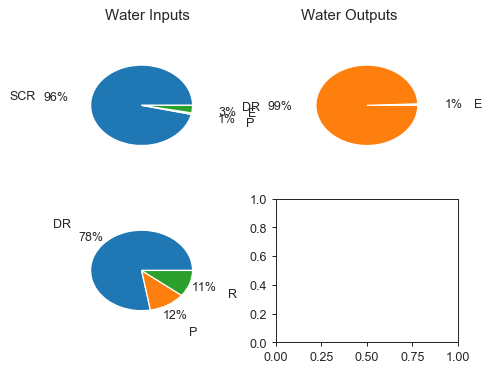

In [29]:
# Some data
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

scr = 5117
sco = 5278
sc_p = 32
sc_e = 31
sc_r = 36 + 124
sc_in_frac = np.array([scr,sc_p, sc_r])/(scr+sc_p+sc_r)
sc_out_frac = np.array([sc_e, sco])/(sco+sc_e)

le_dr = 5296
le_r = 725
le_p = 789
le_in_frac = np.array([le_dr,le_p, le_r])/(le_dr+le_p+le_r)

# Make figure and axes
fig, axs = plt.subplots(2, 2, figsize=(5,5))

# A standard pie plot
axs[0, 0].pie(sc_in_frac, labels=['SCR', 'P', 'E'], autopct='%.0f%%', radius=0.7, shadow=False, pctdistance=1.7, labeldistance=2.1)
axs[0, 1].pie(sc_out_frac, labels=['E', 'DR'], autopct='%.0f%%', shadow=False,radius=0.7, pctdistance=1.7, labeldistance=2.1)
axs[1, 0].pie(le_in_frac, labels=['DR', 'P', 'R'], autopct='%.0f%%', shadow=False,radius=0.7, pctdistance=1.3, labeldistance=1.8)
# axs[1, 1].pie(fracs, labels=labels, autopct='%.0f%%', shadow=False,radius=0.7, pctdistance=1.7, labeldistance=2.1)

fig.tight_layout(rect=[0, 0.1, 1, 0.9])

axs[0, 0].text(-0.5,1.5, 'Water Inputs', fontsize='large')
axs[0, 1].text(-0.9,1.5, 'Water Outputs', fontsize='large')

plt.show()